In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df1=pd.read_csv('./housePriceTrain.csv')
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df1.shape

(1460, 81)

In [6]:
df1.columns[-1]

'SalePrice'

In [7]:
list_of_cols_with_missing_values=[]
for col in df1.columns:
    if df1[col].isnull().sum()>0:
        list_of_cols_with_missing_values.append(col)
        print(f'{col}: Number of missing values: {df1[col].isnull().sum()}')

LotFrontage: Number of missing values: 259
Alley: Number of missing values: 1369
MasVnrType: Number of missing values: 872
MasVnrArea: Number of missing values: 8
BsmtQual: Number of missing values: 37
BsmtCond: Number of missing values: 37
BsmtExposure: Number of missing values: 38
BsmtFinType1: Number of missing values: 37
BsmtFinType2: Number of missing values: 38
Electrical: Number of missing values: 1
FireplaceQu: Number of missing values: 690
GarageType: Number of missing values: 81
GarageYrBlt: Number of missing values: 81
GarageFinish: Number of missing values: 81
GarageQual: Number of missing values: 81
GarageCond: Number of missing values: 81
PoolQC: Number of missing values: 1453
Fence: Number of missing values: 1179
MiscFeature: Number of missing values: 1406


In [8]:
df1=df1.drop(["PoolQC","Fence","MiscFeature",'Alley'],axis=1)

In [9]:
df1.shape

(1460, 77)

In [10]:
len(df1['LotFrontage'][~df1['LotFrontage'].isnull()].values)

1201

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7e58de6e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7e18c293a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7e58de6b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7e18c298e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7e18c29b80>],
 'means': []}

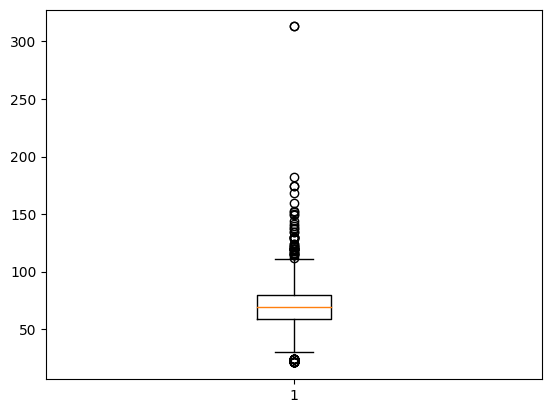

In [11]:
plt.boxplot(df1['LotFrontage'].dropna())

Finding Outliers

InterQuartile Range= Q3-Q1

Outliers are those which fall outside of (Q1 - (1.75*(Q3-Q1))) and (Q3 + (1.75*(Q3-Q1)))

In [12]:
q1=df1['LotFrontage'].quantile(0.25)
q3=df1['LotFrontage'].quantile(0.75)
iqr=q3-q1
df1=df1[~((df1['LotFrontage']<(q1-2*iqr)) |  (df1['LotFrontage']>(q3+2*iqr)))]

In [13]:
len(df1['LotFrontage'].isnull())

1434

(array([ 23.,  19.,   0.,   0.,   6.,   6.,  19.,  11.,   2.,  18.,  16.,
         12.,   6.,  10.,  72.,  24.,  23.,  17.,  20., 151.,  26.,  63.,
         27.,  30.,  82.,  35.,  68.,  20.,  42.,  75.,  17.,  49.,  15.,
         16.,  29.,  18.,  13.,  10.,  11.,  18.,   7.,   9.,   8.,   5.,
          7.,   1.,   4.,   2.,   2.,  11.]),
 array([ 21.  ,  23.02,  25.04,  27.06,  29.08,  31.1 ,  33.12,  35.14,
         37.16,  39.18,  41.2 ,  43.22,  45.24,  47.26,  49.28,  51.3 ,
         53.32,  55.34,  57.36,  59.38,  61.4 ,  63.42,  65.44,  67.46,
         69.48,  71.5 ,  73.52,  75.54,  77.56,  79.58,  81.6 ,  83.62,
         85.64,  87.66,  89.68,  91.7 ,  93.72,  95.74,  97.76,  99.78,
        101.8 , 103.82, 105.84, 107.86, 109.88, 111.9 , 113.92, 115.94,
        117.96, 119.98, 122.  ]),
 <BarContainer object of 50 artists>)

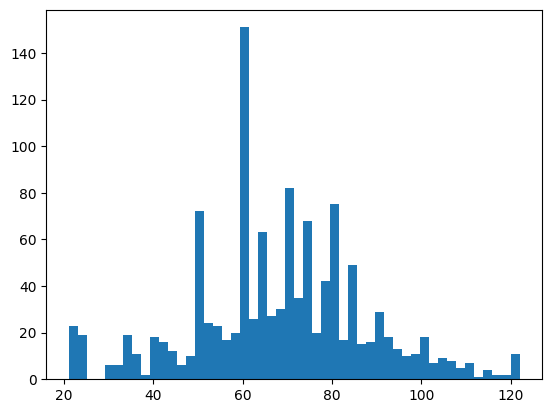

In [14]:
plt.hist(df1['LotFrontage'][~df1['LotFrontage'].isnull()].values,bins=50)

It's approximately a normal distribution , so filling missing values with mean of the column, storing all the ways of data imputation

In [15]:
colNameandMean={}

In [16]:
colNameandMean['LotFrontage']=df1['LotFrontage'].mean()

In [17]:
df1['LotFrontage']=df1['LotFrontage'].fillna(df1['LotFrontage'].mean())

In [18]:
sum(df1['LotFrontage'].isnull())

0

MasVnrType, has around 856 null values, imputing using mode as it;s a caegorical variable , other possible steps would be , 
1. drop the col
2. Create a new category 'None' and fill missing values with it 
3. Predictive imputation (Use only if you know that the column is extremely useful)

In [19]:
df1['MasVnrType'].value_counts()

MasVnrType
BrkFace    439
Stone      124
BrkCmn      15
Name: count, dtype: int64

In [20]:
df1['MasVnrType'].mode()

0    BrkFace
Name: MasVnrType, dtype: object

In [21]:
colNameandMean['MasVnrType']=df1['MasVnrType'].mode()[0]

In [22]:
df1['MasVnrType']=df1['MasVnrType'].fillna(df1['MasVnrType'].mode()[0])

In [23]:
sum(df1['MasVnrType'].isnull())

0

MasVnrArea has just 8 missing values

(array([1.055e+03, 2.190e+02, 9.300e+01, 2.800e+01, 1.700e+01, 6.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([   0.,  160.,  320.,  480.,  640.,  800.,  960., 1120., 1280.,
        1440., 1600.]),
 <BarContainer object of 10 artists>)

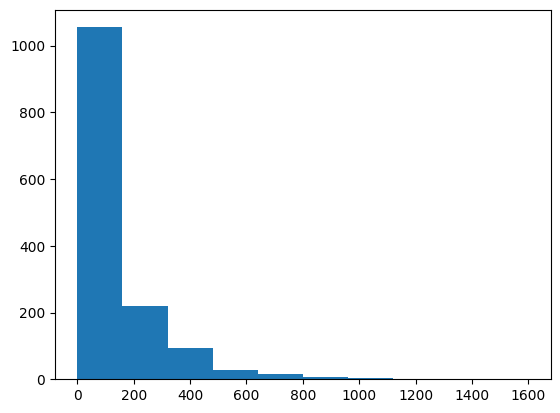

In [24]:
plt.hist(df1['MasVnrArea'])

In [25]:
sum(~df1['MasVnrArea'].isnull())

1426

In [26]:
df1=df1[~df1['MasVnrArea'].isnull()]

In [27]:
sum(df1['MasVnrArea'].isnull())

0

BsmtQual , categorical variable , 37 missing values , using mode to fill

In [28]:
colNameandMean['BsmtQual']=df1['BsmtQual'].mode()[0]

In [29]:
df1['BsmtQual'].mode()[0]


'TA'

In [30]:
df1['BsmtQual']=df1['BsmtQual'].fillna(df1['BsmtQual'].mode()[0])

BsmtCond has 37 missing values, using mode to fill them 

In [31]:
colNameandMean['BsmtCond']=df1['BsmtCond'].mode()[0]

In [32]:
colNameandMean

{'LotFrontage': 68.12765957446808,
 'MasVnrType': 'BrkFace',
 'BsmtQual': 'TA',
 'BsmtCond': 'TA'}

In [33]:
df1['BsmtCond'].mode()

0    TA
Name: BsmtCond, dtype: object

In [34]:
df1['BsmtCond']=df1['BsmtCond'].fillna(df1['BsmtCond'].mode()[0])

In [35]:
df1['BsmtExposure'].value_counts()

BsmtExposure
No    934
Av    215
Gd    127
Mn    112
Name: count, dtype: int64

In [36]:
colNameandMean['BsmtExposure']=df1['BsmtExposure'].mode()[0]
colNameandMean['BsmtFinType1']=df1['BsmtFinType1'].mode()[0]
colNameandMean['BsmtFinType2']=df1['BsmtFinType2'].mode()[0]
colNameandMean['Electrical']=df1['Electrical'].mode()[0]
colNameandMean['GarageType']=df1['GarageType'].mode()[0]

In [37]:
df1['BsmtExposure']=df1['BsmtExposure'].fillna(df1['BsmtExposure'].mode()[0])

In [38]:
df1['BsmtFinType1']=df1['BsmtFinType1'].fillna(df1['BsmtFinType1'].mode()[0])

In [39]:
df1['BsmtFinType2']=df1['BsmtFinType2'].fillna(df1['BsmtFinType2'].mode()[0])

In [40]:
df1['Electrical']=df1['Electrical'].fillna(df1['Electrical'].mode()[0])

In [41]:
df1=df1.drop(['FireplaceQu'],axis=1)

In [42]:
df1['GarageType']=df1['GarageType'].fillna(df1['GarageType'].mode()[0])


In [43]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

Implies the house doesn't have a garage , so making it None for categorical and 0 for numerical to make it consistent across for house with no garage

In [44]:
for i in ['GarageType','GarageQual', 'GarageCond','GarageFinish']:
    colNameandMean[i]='None'

In [45]:
df1[df1['GarageYrBlt'].isna()][[ 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,Attchd,NaN,NaN,0,0,NaN,NaN
48,Attchd,NaN,NaN,0,0,NaN,NaN
78,Attchd,NaN,NaN,0,0,NaN,NaN
88,Attchd,NaN,NaN,0,0,NaN,NaN
89,Attchd,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,Attchd,NaN,NaN,0,0,NaN,NaN
1407,Attchd,NaN,NaN,0,0,NaN,NaN
1449,Attchd,NaN,NaN,0,0,NaN,NaN
1450,Attchd,NaN,NaN,0,0,NaN,NaN


In [46]:
df1.loc[df1['GarageYrBlt'].isna(),['GarageType','GarageQual', 'GarageCond','GarageFinish']]='None'

In [47]:
colNameandMean['GarageYrBlt']=0

In [48]:
df1.loc[df1['GarageYrBlt'].isna(),'GarageYrBlt']=0

In [49]:
df1[df1['GarageYrBlt']==0][[ 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,None,0.0,None,0,0,None,None
48,None,0.0,None,0,0,None,None
78,None,0.0,None,0,0,None,None
88,None,0.0,None,0,0,None,None
89,None,0.0,None,0,0,None,None
...,...,...,...,...,...,...,...
1349,None,0.0,None,0,0,None,None
1407,None,0.0,None,0,0,None,None
1449,None,0.0,None,0,0,None,None
1450,None,0.0,None,0,0,None,None


In [50]:
colNameandMean

{'LotFrontage': 68.12765957446808,
 'MasVnrType': 'BrkFace',
 'BsmtQual': 'TA',
 'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'Unf',
 'BsmtFinType2': 'Unf',
 'Electrical': 'SBrkr',
 'GarageType': 'None',
 'GarageQual': 'None',
 'GarageCond': 'None',
 'GarageFinish': 'None',
 'GarageYrBlt': 0}

In [51]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [52]:
cols_with_numerical_dtype=[]
for index,col in enumerate(df1.columns):
    print(f'{col} is of type {type(df1.loc[1,col])} with sample data of {df1.loc[1,col]} ')
    if type(df1.loc[1,col]) != type('gg'):
        cols_with_numerical_dtype.append(col)
         

Id is of type <class 'numpy.int64'> with sample data of 2 
MSSubClass is of type <class 'numpy.int64'> with sample data of 20 
MSZoning is of type <class 'str'> with sample data of RL 
LotFrontage is of type <class 'numpy.float64'> with sample data of 80.0 
LotArea is of type <class 'numpy.int64'> with sample data of 9600 
Street is of type <class 'str'> with sample data of Pave 
LotShape is of type <class 'str'> with sample data of Reg 
LandContour is of type <class 'str'> with sample data of Lvl 
Utilities is of type <class 'str'> with sample data of AllPub 
LotConfig is of type <class 'str'> with sample data of FR2 
LandSlope is of type <class 'str'> with sample data of Gtl 
Neighborhood is of type <class 'str'> with sample data of Veenker 
Condition1 is of type <class 'str'> with sample data of Feedr 
Condition2 is of type <class 'str'> with sample data of Norm 
BldgType is of type <class 'str'> with sample data of 1Fam 
HouseStyle is of type <class 'str'> with sample data of 1Stor

In [53]:
df1.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
len(cols_with_numerical_dtype)

38

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
df1.columns[:-1]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [57]:
cols_with_numerical_dtype

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [58]:
df1['MasVnrType'].head()

0    BrkFace
1    BrkFace
2    BrkFace
3    BrkFace
4    BrkFace
Name: MasVnrType, dtype: object

In [59]:
for i in cols_with_numerical_dtype:
    datatype=df1[i].dtype
    if ('int' not in str(datatype)) and ('float' not in str(datatype)):
        print(i, df1[i].dtype)

In [61]:
df_test=pd.read_csv('test.csv')

In [62]:
df_test[cols_with_numerical_dtype[:-1]].isna().sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

Fill the missing values in testing set similar to training set, use same mean values to fill them 

In [63]:
df_test.isna().sum().values

array([   0,    0,    4,  227,    0,    0, 1352,    0,    0,    2,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,    1,  894,   15,    0,    0,    0,   44,   45,   44,
         42,    1,   42,    1,    1,    1,    0,    0,    0,    0,    0,
          0,    0,    0,    2,    2,    0,    0,    0,    0,    1,    0,
          2,    0,  730,   76,   78,   78,    1,    1,   78,   78,    0,
          0,    0,    0,    0,    0,    0, 1456, 1169, 1408,    0,    0,
          0,    1,    0])

In [64]:
colNameandMean

{'LotFrontage': 68.12765957446808,
 'MasVnrType': 'BrkFace',
 'BsmtQual': 'TA',
 'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'Unf',
 'BsmtFinType2': 'Unf',
 'Electrical': 'SBrkr',
 'GarageType': 'None',
 'GarageQual': 'None',
 'GarageCond': 'None',
 'GarageFinish': 'None',
 'GarageYrBlt': 0}

In [69]:
missing_values=df_test[cols_with_numerical_dtype[:-1]].isna().sum()
col_names=missing_values[missing_values>0].index.tolist()

In [71]:
col_names

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

In [72]:
cols_with_no_null_in_test=set(cols_with_numerical_dtype)-set(col_names)

In [68]:
for i in col_names:
    if i in colNameandMean:
        df_test[i]=df_test[i].fillna(colNameandMean[i])

In [75]:
cols_with_no_null_in_test=list(cols_with_no_null_in_test)

In [101]:
cols_with_no_null_in_test=list(set(cols_with_no_null_in_test)-set(['SalePrice','Id']))

In [102]:
model = RandomForestRegressor(n_estimators=150, random_state=0)
model.fit(df1[cols_with_no_null_in_test], df1[df1.columns[-1]])

RandomForestRegressor(n_estimators=150, random_state=0)

In [103]:
test_answers=model.predict(df_test[cols_with_no_null_in_test])

In [104]:
df_test[cols_with_no_null_in_test].head()

,ScreenPorch,Fireplaces,EnclosedPorch,LowQualFinSF,LotArea,YearRemodAdd,BedroomAbvGr,YearBuilt,OpenPorchSF,WoodDeckSF,...,LotFrontage,KitchenAbvGr,MiscVal,PoolArea,OverallQual,2ndFlrSF,YrSold,MoSold,3SsnPorch,1stFlrSF
0,120,0,0,0,11622,1961,2,1961,0,140,...,80.0,1,0,0,5,0,2010,6,0,896
1,0,0,0,0,14267,1958,3,1958,36,393,...,81.0,1,12500,0,6,0,2010,6,0,1329
2,0,1,0,0,13830,1998,3,1997,34,212,...,74.0,1,0,0,5,701,2010,3,0,928
3,0,1,0,0,9978,1998,3,1998,36,360,...,78.0,1,0,0,6,678,2010,6,0,926
4,144,0,0,0,5005,1992,2,1992,82,0,...,43.0,1,0,0,8,0,2010,1,0,1280


In [105]:
answer1=pd.DataFrame({'Id':df_test['Id'],'SalePrice':test_answers})

In [106]:
answer1

,Id,SalePrice
0,1461,122847.660000
1,1462,158953.333333
2,1463,169048.666667
3,1464,182140.666667
4,1465,194653.040000
...,...,...
1454,2915,83793.473333
1455,2916,82029.473333
1456,2917,150359.580000
1457,2918,107566.533333


In [107]:
answer1.to_csv('submission.csv',index=False)

In [108]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [113]:
import torch
from torch import nn

In [126]:
x_train=torch.tensor(df1[cols_with_no_null_in_test].values,dtype=torch.float32)
y_train=torch.tensor(df1['SalePrice'].values,dtype=torch.float32)

In [127]:
class pricePredictor(nn.Module):
    def __init__(self,layers):
        super().__init__()
        self.hiddenLayers=nn.ModuleList()
        for i,j in zip(layers,layers[1:]):
            self.hiddenLayers.append(nn.Linear(i,j))

    def forward(self,x):
        for i in range(len(self.hiddenLayers)):
            x=torch.relu(self.hiddenLayers[i](x))

        return x



In [132]:
yhat.squeeze()

tensor([178497.7031, 179710.4531, 177778.6562,  ..., 183363.4844,
        178486.1250, 176755.0781], grad_fn=<SqueezeBackward0>)

In [131]:
y_train.shape

torch.Size([1426])

In [133]:
model=pricePredictor([27,27*8,27*8,27,1])
epochs=100
optimiser=torch.optim.Adam(model.parameters(),lr=0.01)
criterion=nn.MSELoss()
for i in range(epochs):
    yhat=model(x_train)
    loss=criterion(yhat.squeeze(),y_train)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()



In [137]:
x_test=torch.tensor(df_test[cols_with_no_null_in_test].values,dtype=torch.float32)

In [138]:
model(x_test)

tensor([[134992.3750],
        [170500.0312],
        [196825.9062],
        ...,
        [195304.7812],
        [ 99648.0312],
        [226140.5312]], grad_fn=<ReluBackward0>)